## Importación librerias

In [1]:

import pandas as pd
import numpy as np


from IPython.display import display 





## Comprobación entorno
Terminal, Kernel y notebook mismo entorno


In [2]:
import sys, os
print(sys.executable)          
print(os.environ.get("VIRTUAL_ENV"))  


c:\Users\Propietario\Desktop\PROYECTO PYTHON FOR DATA\PROYECTO_EDA_PYTHON\.venv\Scripts\python.exe
C:\Users\Propietario\desktop\PROYECTO PYTHON FOR DATA\PROYECTO_EDA_PYTHON\.venv


## Carga de datos

In [3]:
df_customer = pd.read_excel("../Data/Raw/customer-details.xlsx")

Uno todas las hojas del Excell

In [4]:
df_customer = pd.concat(
    pd.read_excel("../Data/Raw/customer-details.xlsx", sheet_name=None).values(),
    ignore_index=True
)


In [5]:
df_customer. sample(10)

,Unnamed: 0,Income,Kidhome,Teenhome,Dt_Customer,NumWebVisitsMonth,ID
34235,5155,53685,0,0,2014-03-01,1,aa4e93f4-1551-4107-978a-aec1537a62b6
35206,6126,157476,1,1,2014-04-07,15,4deb4e94-ff9d-4d41-9c00-32c00d9f1e97
13542,13542,124695,1,1,2012-11-26,29,7f45ad18-b957-47db-bbfb-a6de6e6ec598
31240,2160,160031,0,1,2014-08-26,21,8f2df1a0-546a-43dc-a99e-92726f60d285
13579,13579,22095,0,2,2012-09-10,24,6b48543b-3d37-4bdd-81b9-7b12f163a6d1
32062,2982,142283,2,1,2014-12-13,10,0d808e16-c9ef-4733-a027-a931dbb76264
15735,15735,113432,0,0,2012-12-11,8,0d7ca496-d9a8-4ae0-bdf0-a0a2e22280e0
3507,3507,110955,0,1,2012-11-30,23,18a49b2b-71a7-4665-bc97-dcbb2625c4e9
13478,13478,67733,2,0,2012-01-18,26,985ea136-82f0-4077-aace-10ed6b4df7b9
8992,8992,26094,1,1,2012-01-06,24,c5753a95-cf15-4942-8414-5cc19ae4be4a


In [6]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43170 entries, 0 to 43169
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unnamed: 0         43170 non-null  int64         
 1   Income             43170 non-null  int64         
 2   Kidhome            43170 non-null  int64         
 3   Teenhome           43170 non-null  int64         
 4   Dt_Customer        43170 non-null  datetime64[ns]
 5   NumWebVisitsMonth  43170 non-null  int64         
 6   ID                 43170 non-null  object        
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 2.3+ MB


# Columnas e información

0. Unnamed: 0 (int64)

No es una variable útil: se puede eliminar.

1. Income (int64)

Ingresos de la persona/cliente: análisis socioeconómico

2. Kidhome (int64)

Número de hijos pequeños en el hogar: variable numérica

3. Teenhome (int64)

Número de adolescentes en el hogar: variable numérica

4. Dt_Customer (datetime64[ns])

Fecha en la que el cliente se unió / fue registrado: antiguedad.

5. NumWebVisitsMonth (int64)

Número de visitas web al mes: comportamiento online.

6. ID (object)

Identificador único del cliente: clave primaria.

# * Pasos limpieza y transformación

1.	Eliminar Unnamed: 0.

2.	Revisar duplicados en ID.

3.	Distribución de Income: outliers, clientes con ingresos extremos.

4.	Distribución de Kidhome y Teenhome: hogares sin hijos, con hijos, etc.

5.	Antigüedad del cliente: calcular diferencia entre fecha actual y Dt_Customer.

6.	NumWebVisitsMonth: ver promedios, clientes más activos, correlación con ingresos.


# 1. Eliminar Unnamed

1. Ver todas las columnas
2. Quito cualquier columna que empiece por Unnamed
3. Confirmo resultado


In [7]:

print(df_customer.columns)

df_customer = df_customer.loc[:, ~df_customer.columns.str.contains('^Unnamed')]

print(df_customer.columns)



Index(['Unnamed: 0', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer',
       'NumWebVisitsMonth', 'ID'],
      dtype='object')
Index(['Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'NumWebVisitsMonth',
       'ID'],
      dtype='object')


# 2. Revisar duplicados de id

1. Nº de IDs totales
2. Nº de IDs únicos
3. Nº de duplicados

In [8]:
total_ids = df_customer['ID'].shape[0]

unique_ids = df_customer['ID'].nunique()

duplicated_ids = total_ids - unique_ids

print("Total de registros:", total_ids)
print("IDs únicos:", unique_ids)
print("Duplicados:", duplicated_ids)


Total de registros: 43170
IDs únicos: 43170
Duplicados: 0


# 3. Distribución de Income

1. Aseguro tipo numérico y revisa nulos
2. Chequeos rápidos de calidad
3. Detección de outliers (regla IQR): No se detectan outliers en la variable Income según la regla IQR y percentiles (p01–p99). Se mantiene la variable sin modificaciones.
4. Umbrales percentil
5. Boxplot de Income

In [9]:
#1. Aseguro tipo numérico y reviso nulos
df_customer['Income'] = pd.to_numeric(df_customer['Income'], errors='coerce')

print(df_customer['Income'].dtype)
print('Nulos en Income:', df_customer['Income'].isna().sum())
df_customer['Income'].describe()


int64
Nulos en Income: 0


count     43170.000000
mean      93227.389622
std       50498.181989
min        5841.000000
25%       49608.000000
50%       93009.500000
75%      136740.500000
max      180802.000000
Name: Income, dtype: float64

In [10]:
# 2. Chequeos rápidos de calidad
print('<=0:', (df_customer['Income'] <= 0).sum())

df_customer['Income'].quantile([0.25, 0.5, 0.75, 0.9, 0.95, 0.99])


<=0: 0


0.25     49608.00
0.50     93009.50
0.75    136740.50
0.90    163197.40
0.95    172366.75
0.99    179057.00
Name: Income, dtype: float64

In [11]:
# 3. Detección de outliers (regla IQR)
q1 = df_customer['Income'].quantile(0.25)
q3 = df_customer['Income'].quantile(0.75)
iqr = q3 - q1
low  = q1 - 1.5*iqr
high = q3 + 1.5*iqr

df_customer['income_outlier_iqr'] = ~df_customer['Income'].between(low, high)
df_customer['income_outlier_iqr'].value_counts()


income_outlier_iqr
False    43170
Name: count, dtype: int64

In [12]:
# 4. Umbrales percentil
p01 = df_customer['Income'].quantile(0.01)
p99 = df_customer['Income'].quantile(0.99)




Realizo un boxplot income como verificación visual de la distribución y confirmación de que no existen outliers

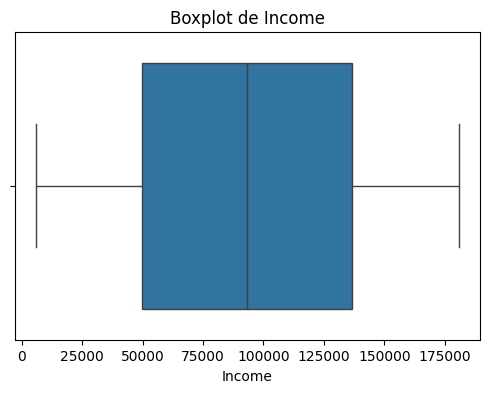

In [13]:
#5. Boxplot de income
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(6,4))
sns.boxplot(x=df_customer['Income'])
plt.title('Boxplot de Income')
plt.show()





# 4. Distribución de Kidhome y Teenhome: hogares sin hijos, con hijos.
1. Importo Numpy
2. Conviero las columnas en nº enteros, errores en NaN.
3. Distribución y nulos
4. Total de hijos. Creo variable deribada.


In [ ]:
# 2. Convierto en nº enteros, errores.

for c in ['Kidhome','Teenhome']:
    df_customer[c] = pd.to_numeric(df_customer[c], errors='coerce').astype('Int64')


In [24]:
# 3. Distribución básica y nulos

for c in ['Kidhome','Teenhome']:
    print(f"{c}  - nulos:", df_customer[c].isna().sum())
    print(df_customer[c].value_counts(dropna=False).sort_index(), "\n")

Kidhome  - nulos: 0
Kidhome
0    14270
1    14425
2    14475
Name: count, dtype: Int64 

Teenhome  - nulos: 0
Teenhome
0    14402
1    14425
2    14343
Name: count, dtype: Int64 



In [20]:
# 4. Total de hijos
df_customer['Children_total'] = (df_customer['Kidhome'] . fillna(0) +
                                                    df_customer['Teenhome'] . fillna(0)). astype ('int64')


Confirmo la creación de la columna =total children

In [27]:
df_customer. sample(20)


,Income,Kidhome,Teenhome,Dt_Customer,NumWebVisitsMonth,ID,income_outlier_iqr,Children_total
40660,161900,0,0,2014-12-16,14,1c46bce1-f185-4dce-a911-8e9c8796e794,False,0
42417,111307,1,2,2014-05-06,20,a1155525-ea34-4703-93bc-4a705a1a1272,False,3
27837,10875,2,2,2013-07-21,10,2815e3fc-36e3-4570-971e-c414ebaef4b6,False,4
4741,8529,2,0,2012-04-11,24,601debcc-8b4f-4d60-ad67-386fe13788cb,False,2
21685,12641,1,0,2013-02-17,12,61cc712c-e4a2-492a-a993-bad7e964765d,False,1
31116,40897,0,0,2014-03-06,4,62fa7c13-4745-4f59-8dc5-4e05bebf85d6,False,0
4664,155848,2,0,2012-02-29,5,d176ee0c-a13c-4cbc-bdf3-8536ca9db0b6,False,2
7131,94627,2,0,2012-08-16,26,0164e422-c21b-4df7-a20b-59faadc703ea,False,2
36238,180405,1,2,2014-04-29,1,dfb0e336-923c-4b45-9f69-0dbdd8c8518d,False,3
7558,154864,2,2,2012-12-05,24,fd524dad-44aa-430a-b20c-6f429750b8eb,False,4


Realizo un boxplot de la variable Children_total como verificación visual de la distribución y confirmación de que no existen outliers.

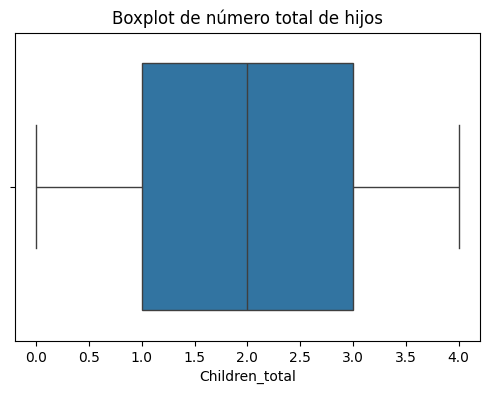

In [28]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df_customer['Children_total'])
plt.title("Boxplot de número total de hijos")
plt.show()

In [14]:
df_bank = pd.read_csv("../Data/Raw/bank-additional.csv")

In [15]:
df_bank. sample(10)

,Unnamed: 0,age,job,marital,education,default,housing,loan,contact,duration,...,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,latitude,longitude,id_
11695,11792,31.0,management,MARRIED,university.degree,0.0,0.0,0.0,telephone,101,...,1.4,"94,465","-41,8","4,959","5228,1",no,29-mayo-2017,41.574,-114.654,dccf0055-4273-4bb8-b41b-7a673e4d4908
14286,14383,59.0,blue-collar,DIVORCED,basic.4y,NaN,0.0,1.0,cellular,84,...,1.4,"93,918","-42,7","4,962","5228,1",no,17-junio-2017,49.065,-121.987,c28bc6f8-0b66-4953-8176-29a13fde6710
9832,9929,33.0,admin.,MARRIED,university.degree,0.0,1.0,1.0,telephone,59,...,1.4,"94,465","-41,8","4,959","5228,1",no,13-febrero-2017,28.946,-95.633,54ded796-4144-4f07-a1c4-2a2d23460e85
27949,28093,54.0,housemaid,MARRIED,NaN,0.0,1.0,0.0,cellular,105,...,-1.8,"93,075","-47,1",NaN,"5099,1",no,13-mayo-2017,34.983,-103.627,eda0eaa3-60b9-4ed8-b69c-405678db3e7a
20796,20893,NaN,blue-collar,MARRIED,basic.4y,0.0,NaN,NaN,cellular,114,...,1.4,"93,444","-36,1","4,964","5228,1",no,5-agosto-2015,31.647,-72.491,05d84a95-aa2c-4478-8b43-87fc2b917a28
613,667,31.0,admin.,SINGLE,university.degree,0.0,0.0,0.0,telephone,189,...,1.1,"93,994","-36,4","4,857",5191,no,23-febrero-2019,24.476,-77.729,51be80d2-a93c-43fd-bd92-34e2a154fd93
21371,21468,33.0,technician,SINGLE,professional.course,0.0,1.0,0.0,cellular,101,...,1.4,"93,444","-36,1","4,963","5228,1",no,22-julio-2018,41.034,-94.111,f73e84bc-efbe-47a0-81a9-78579f9bea7c
26989,27133,43.0,management,SINGLE,high.school,0.0,1.0,0.0,cellular,149,...,-0.1,"93,2",-42,NaN,"5195,8",no,4-mayo-2017,27.665,-116.609,233e3f6e-66ef-47e8-8e2b-f0bb51a0e2f0
13587,13684,54.0,blue-collar,MARRIED,high.school,0.0,0.0,1.0,cellular,313,...,1.4,"93,918","-42,7","4,963","5228,1",no,23-junio-2019,27.083,-109.762,249c5c03-6543-4e44-b4ae-d2c9f69b8d82
2988,3085,45.0,blue-collar,MARRIED,basic.9y,NaN,0.0,0.0,telephone,90,...,1.1,"93,994","-36,4",NaN,5191,no,25-noviembre-2018,37.470,-103.193,cfd85c8b-2602-4661-b4ef-80bf3d7ecc37


In [16]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43000 entries, 0 to 42999
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      43000 non-null  int64  
 1   age             37880 non-null  float64
 2   job             42655 non-null  object 
 3   marital         42915 non-null  object 
 4   education       41193 non-null  object 
 5   default         34019 non-null  float64
 6   housing         41974 non-null  float64
 7   loan            41974 non-null  float64
 8   contact         43000 non-null  object 
 9   duration        43000 non-null  int64  
 10  campaign        43000 non-null  int64  
 11  pdays           43000 non-null  int64  
 12  previous        43000 non-null  int64  
 13  poutcome        43000 non-null  object 
 14  emp.var.rate    43000 non-null  float64
 15  cons.price.idx  42529 non-null  object 
 16  cons.conf.idx   43000 non-null  object 
 17  euribor3m       33744 non-null 

# Columnas e información ( Hay datos incompletos)

0. Unnamed:  se puede eliminar

1. age (float64): edad de la persona.

2. job (object): profesión.

3. marital (object): estado civil.

4. education (object): educación.

5. default (float64): si el cliente tiene crédito con impago (posibles nulos).

6. housing (float64): si tiene préstamo hipotecario (posibles nulos).

7. loan (float64): si tiene préstamo personal (posibles nulos).

8. contact (object): tipo de contacto.

9. duration (int64): duración de la llamada/contacto en segundos.

10. campaign (int64):  número de veces que se ha contactado al cliente.

11. pdays (int64): días desde el último contacto (999 significa que nunca se contactó).

12. previous (int64): número de contactos anteriores.

13. poutcome (object): resultado de campaña de marketing anterior.

14. emp.var.rate (float64): indicador económico (tasa de variación del empleo).

15. cons.price.idx (object): indice de precios del consumidor.

16. cons.conf.idx (object): indice de confianza del consumidor.

17. euribor3m (object): tasa de interés euríbor a 3 meses.

18. nr.employed (object): número de empleados (indicador económico).

19. month (object): mes del último contacto de la campaña.

20. day_of_week (object): día de la semana del último contacto.

21. longitude (float64): localización geográfica.

22. id (object): identificador único del cliente.

23. y (object): variable objetivo (si el cliente contrató o no el producto/servicio).


# * Pasos limpieza y transformación



Eliminar Unnamed: 0.

Revisar valores faltantes (default, housing, loan, marital, job).

Analizar la variable objetivo y (cuántos clientes aceptaron vs rechazaron)

Distribución de edad: ver segmentos más contactados.

Cruzar duración de llamadas (duration) con éxito (y).

Revisar variables económicas (euribor3m, emp.var.rate): ómo influyen en la respuesta.

Outliers en duración de llamadas y pdays.




